In [5]:
import os, json
import pandas as pd
import numpy as np
import glob
import re
from geopy.distance import geodesic

import datetime
import ooipy
import matplotlib.pyplot as plt
from datetime import timedelta
import time
import pickle
import warnings
warnings.filterwarnings("ignore")

In [6]:
os.getcwd()

'C:\\Users\\khirod\\Documents\\GitHub\\Ocean-data-analysis'

In [7]:
#ais = pd.read_csv('Axial Base-20220628T081651Z-001/Axial Base/2015A - Updated.csv',sep = ',')

In [8]:
import functions as fn

In [40]:
oregon_slope_Lat=44.5153
oregon_slope_Lon=-125.3898
Southern_hydrate_Lat=44.5691
Southern_hydrate_lon=-125.1481



In [29]:
lat_oregon,lon_oregon=fn.get_circle_coordinates(40*1000,oregon_slope_Lat,oregon_slope_Lon)

In [36]:
lat_shydrate,lon_shydrate=fn.get_circle_coordinates(40*1000,Southern_hydrate_Lat,Southern_hydrate_lon)

In [34]:
min(lat_oregon),max(lat_oregon)

(44.15597388635219, 44.874626113647814)

In [35]:
min(lon_oregon),max(lon_oregon)

(-125.89371898691299, -124.885881013087)

In [37]:
min(lat_shydrate),max(lat_shydrate)

(44.20977388635219, 44.92842611364781)

In [38]:
min(lat_shydrate),max(lat_shydrate)

(44.20977388635219, 44.92842611364781)

In [13]:
import plotly.express as px

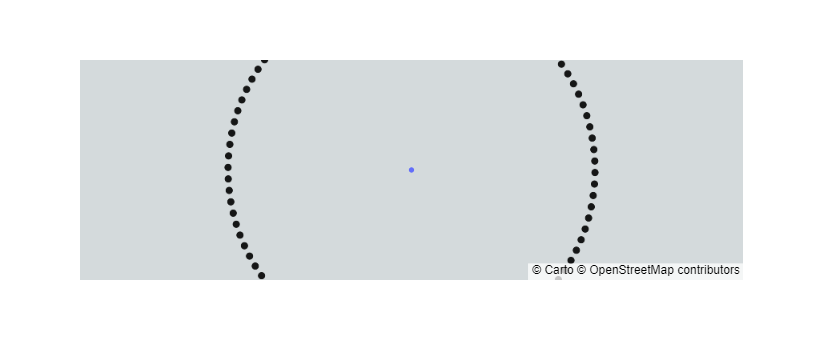

In [32]:
fig=px.scatter_mapbox(lat=[oregon_slope_Lat],lon=[oregon_slope_Lon],mapbox_style='carto-positron')
fig1 = px.scatter_mapbox(lat=lat_oregon,lon=lon_oregon,mapbox_style='carto-positron')
fig1.update_traces(marker = {'size': 8, 'color':'black','opacity':0.9})
fig.add_trace(fig1.data[0])
fig.update_layout(coloraxis_showscale=False,mapbox=dict(
       
                bearing=10,
                center=dict(
                    lat=oregon_slope_Lat,
                    lon=oregon_slope_Lon,
                )))
fig.show()

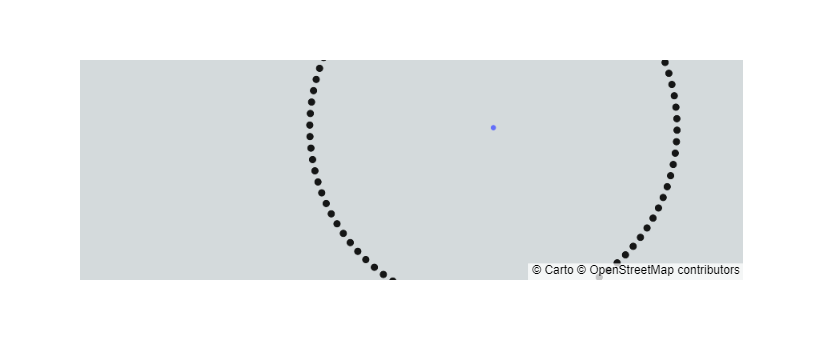

In [42]:
fig=px.scatter_mapbox(lat=[Southern_hydrate_Lat],lon=[Southern_hydrate_lon],mapbox_style='carto-positron')
fig1 = px.scatter_mapbox(lat=lat_shydrate,lon=lon_shydrate,mapbox_style='carto-positron')
fig1.update_traces(marker = {'size': 8, 'color':'black','opacity':0.9})
fig.add_trace(fig1.data[0])
fig.update_layout(coloraxis_showscale=False,mapbox=dict(
       
                bearing=10,
                center=dict(
                    lat=oregon_slope_Lat,
                    lon=oregon_slope_Lon,
                )))
fig.show()

### Read csv

In [45]:
ais = pd.read_csv('E:/Acer backup 3/internships and jobs/UW/Reader grader and TA/Shima Abadi/Data/oregon_hydrate/AIS_166662673338955534_5005-1666628353878.csv',sep = ',')

In [46]:
ais.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,636092819,2021-01-01T00:17:40,44.56820,-125.62248,11.0,180.6,181.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
1,636092819,2021-01-01T00:19:00,44.56414,-125.62273,11.1,187.9,180.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
2,636092819,2021-01-01T00:20:08,44.56068,-125.62271,11.4,162.9,179.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
3,636092819,2021-01-01T00:22:19,44.55397,-125.62281,10.9,186.6,182.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A
4,636092819,2021-01-01T00:24:00,44.54881,-125.62310,10.8,177.9,180.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,A


In [47]:
ais['TIMESTAMP UTC'] = pd.to_datetime(ais['BaseDateTime']).dt.strftime('%Y-%m-%d %H:%M:%S')
ais['TIMESTAMP UTC'] = pd.to_datetime(ais['TIMESTAMP UTC'])

In [48]:
x=ais['TIMESTAMP UTC'].dt.day


### Calculate distance based on GPS coordinates

In [49]:
# For Oregon slope base
ais['oregon_slope_Lat']=oregon_slope_Lat
ais['oregon_slope_Lon']=oregon_slope_Lon
ais['oregon_slope_Loc'] = list(zip(ais.oregon_slope_Lat,ais.oregon_slope_Lon))
ais['ship_Loc'] = list(zip(ais.LAT,ais.LON))
ais.head()


,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,Length,Width,Draft,Cargo,TransceiverClass,TIMESTAMP UTC,oregon_slope_Lat,oregon_slope_Lon,oregon_slope_Loc,ship_Loc
0,636092819,2021-01-01T00:17:40,44.56820,-125.62248,11.0,180.6,181.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,2021-01-01 00:17:40,44.5153,-125.3898,"(44.5153, -125.3898)","(44.5682, -125.62248)"
1,636092819,2021-01-01T00:19:00,44.56414,-125.62273,11.1,187.9,180.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,2021-01-01 00:19:00,44.5153,-125.3898,"(44.5153, -125.3898)","(44.56414, -125.62273)"
2,636092819,2021-01-01T00:20:08,44.56068,-125.62271,11.4,162.9,179.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,2021-01-01 00:20:08,44.5153,-125.3898,"(44.5153, -125.3898)","(44.56068, -125.62271)"
3,636092819,2021-01-01T00:22:19,44.55397,-125.62281,10.9,186.6,182.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,2021-01-01 00:22:19,44.5153,-125.3898,"(44.5153, -125.3898)","(44.55397, -125.62281)"
4,636092819,2021-01-01T00:24:00,44.54881,-125.62310,10.8,177.9,180.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,A,2021-01-01 00:24:00,44.5153,-125.3898,"(44.5153, -125.3898)","(44.54881, -125.6231)"


In [50]:
# For southern hydrate
ais['Southern_hydrate_Lat']=Southern_hydrate_Lat
ais['Southern_hydrate_lon']=Southern_hydrate_lon
ais['Southern_hydrate_Loc'] = list(zip(ais.Southern_hydrate_Lat,ais.Southern_hydrate_lon))

In [51]:
#Function to calculate distance distance from axial base
def geodistance_oregon(row):
    coords_1 = row.oregon_slope_Loc
    coords_2 = row.ship_Loc
    return round(geodesic(coords_1, coords_2).km,2)


In [52]:
#Function to calculate distance distance from central caldera
def geodistance_shydrate(row):
    coords_1 = row.Southern_hydrate_Loc
    coords_2 = row.ship_Loc
    return round(geodesic(coords_1, coords_2).km,2)

In [53]:
ais['distance(in km) oregon'] = ais.apply(geodistance_oregon, axis=1)
ais['distance(in km) hydrate'] = ais.apply(geodistance_shydrate, axis=1)
ais.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,TIMESTAMP UTC,oregon_slope_Lat,oregon_slope_Lon,oregon_slope_Loc,ship_Loc,Southern_hydrate_Lat,Southern_hydrate_lon,Southern_hydrate_Loc,distance(in km) oregon,distance(in km) hydrate
0,636092819,2021-01-01T00:17:40,44.56820,-125.62248,11.0,180.6,181.0,NaN,NaN,NaN,...,2021-01-01 00:17:40,44.5153,-125.3898,"(44.5153, -125.3898)","(44.5682, -125.62248)",44.5691,-125.1481,"(44.5691, -125.1481)",19.40,37.68
1,636092819,2021-01-01T00:19:00,44.56414,-125.62273,11.1,187.9,180.0,NaN,NaN,NaN,...,2021-01-01 00:19:00,44.5153,-125.3898,"(44.5153, -125.3898)","(44.56414, -125.62273)",44.5691,-125.1481,"(44.5691, -125.1481)",19.29,37.71
2,636092819,2021-01-01T00:20:08,44.56068,-125.62271,11.4,162.9,179.0,NaN,NaN,NaN,...,2021-01-01 00:20:08,44.5153,-125.3898,"(44.5153, -125.3898)","(44.56068, -125.62271)",44.5691,-125.1481,"(44.5691, -125.1481)",19.19,37.72
3,636092819,2021-01-01T00:22:19,44.55397,-125.62281,10.9,186.6,182.0,NaN,NaN,NaN,...,2021-01-01 00:22:19,44.5153,-125.3898,"(44.5153, -125.3898)","(44.55397, -125.62281)",44.5691,-125.1481,"(44.5691, -125.1481)",19.01,37.75
4,636092819,2021-01-01T00:24:00,44.54881,-125.62310,10.8,177.9,180.0,NaN,NaN,NaN,...,2021-01-01 00:24:00,44.5153,-125.3898,"(44.5153, -125.3898)","(44.54881, -125.6231)",44.5691,-125.1481,"(44.5691, -125.1481)",18.91,37.81


In [71]:
ais.rename(columns={'VesselType':'VESSEL TYPE','Length':'LENGTH'},inplace=True)

### Export the dataframe to csv

In [72]:
ais.to_csv('E:/Acer backup 3/internships and jobs/UW/Reader grader and TA/Shima Abadi/Data/oregon_hydrate.csv')

In [73]:
ais.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,TIMESTAMP UTC,oregon_slope_Lat,oregon_slope_Lon,oregon_slope_Loc,ship_Loc,Southern_hydrate_Lat,Southern_hydrate_lon,Southern_hydrate_Loc,distance(in km) oregon,distance(in km) hydrate
0,636092819,2021-01-01T00:17:40,44.56820,-125.62248,11.0,180.6,181.0,NaN,NaN,NaN,...,2021-01-01 00:17:40,44.5153,-125.3898,"(44.5153, -125.3898)","(44.5682, -125.62248)",44.5691,-125.1481,"(44.5691, -125.1481)",19.40,37.68
1,636092819,2021-01-01T00:19:00,44.56414,-125.62273,11.1,187.9,180.0,NaN,NaN,NaN,...,2021-01-01 00:19:00,44.5153,-125.3898,"(44.5153, -125.3898)","(44.56414, -125.62273)",44.5691,-125.1481,"(44.5691, -125.1481)",19.29,37.71
2,636092819,2021-01-01T00:20:08,44.56068,-125.62271,11.4,162.9,179.0,NaN,NaN,NaN,...,2021-01-01 00:20:08,44.5153,-125.3898,"(44.5153, -125.3898)","(44.56068, -125.62271)",44.5691,-125.1481,"(44.5691, -125.1481)",19.19,37.72
3,636092819,2021-01-01T00:22:19,44.55397,-125.62281,10.9,186.6,182.0,NaN,NaN,NaN,...,2021-01-01 00:22:19,44.5153,-125.3898,"(44.5153, -125.3898)","(44.55397, -125.62281)",44.5691,-125.1481,"(44.5691, -125.1481)",19.01,37.75
4,636092819,2021-01-01T00:24:00,44.54881,-125.62310,10.8,177.9,180.0,NaN,NaN,NaN,...,2021-01-01 00:24:00,44.5153,-125.3898,"(44.5153, -125.3898)","(44.54881, -125.6231)",44.5691,-125.1481,"(44.5691, -125.1481)",18.91,37.81


In [74]:
ais.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VESSEL TYPE', 'Status', 'LENGTH',
       'Width', 'Draft', 'Cargo', 'TransceiverClass', 'TIMESTAMP UTC',
       'oregon_slope_Lat', 'oregon_slope_Lon', 'oregon_slope_Loc', 'ship_Loc',
       'Southern_hydrate_Lat', 'Southern_hydrate_lon', 'Southern_hydrate_Loc',
       'distance(in km) oregon', 'distance(in km) hydrate'],
      dtype='object')

In [58]:
ais.describe()

,MMSI,LAT,LON,SOG,COG,Heading,VesselType,Status,Length,Width,Draft,Cargo,oregon_slope_Lat,oregon_slope_Lon,Southern_hydrate_Lat,Southern_hydrate_lon,distance(in km) oregon,distance(in km) hydrate
count,7.081980e+05,708198.000000,708198.000000,708198.000000,708198.000000,708198.000000,667091.000000,685333.00000,633485.000000,600947.000000,527392.000000,464371.000000,7.081980e+05,7.081980e+05,7.081980e+05,7.081980e+05,708198.000000,708198.000000
mean,3.913542e+08,44.473627,-125.340132,11.366653,193.214785,200.583258,217.882123,0.79444,169.728583,25.697659,9.571524,67.391904,4.451530e+01,-1.253898e+02,4.456910e+01,-1.251481e+02,27.083923,29.947016
std,1.055504e+08,0.195497,0.233476,5.713701,117.508319,139.918078,347.949325,2.62570,100.121027,11.612829,3.767022,21.324738,1.421086e-14,1.563195e-13,6.394889e-14,1.563195e-13,10.969648,16.286508
min,3.696810e+07,44.142890,-125.899560,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-12.800000,0.000000,4.451530e+01,-1.253898e+02,4.456910e+01,-1.251481e+02,0.000000,0.000000
25%,3.382527e+08,44.302310,-125.501490,8.500000,162.800000,133.000000,70.000000,0.00000,72.250000,15.000000,5.800000,70.000000,4.451530e+01,-1.253898e+02,4.456910e+01,-1.251481e+02,19.540000,16.220000
50%,3.673531e+08,44.477340,-125.273950,12.100000,179.900000,180.000000,70.000000,0.00000,183.000000,31.000000,10.000000,70.000000,4.451530e+01,-1.253898e+02,4.456910e+01,-1.251481e+02,27.580000,28.600000
75%,4.401410e+08,44.634940,-125.154100,14.600000,311.700000,350.000000,90.000000,0.00000,262.000000,32.000000,12.900000,80.000000,4.451530e+01,-1.253898e+02,4.456910e+01,-1.251481e+02,35.330000,42.910000
max,1.000000e+09,44.836190,-125.031230,102.300000,360.000000,511.000000,1025.000000,15.00000,366.000000,76.000000,21.900000,159.000000,4.451530e+01,-1.253898e+02,4.456910e+01,-1.251481e+02,57.890000,76.260000


In [59]:
ais.isnull().sum()

MMSI                            0
BaseDateTime                    0
LAT                             0
LON                             0
SOG                             0
COG                             0
Heading                         0
VesselName                  35207
IMO                         73942
CallSign                    39963
VesselType                  41107
Status                      22865
Length                      74713
Width                      107251
Draft                      180806
Cargo                      243827
TransceiverClass           112549
TIMESTAMP UTC                   0
oregon_slope_Lat                0
oregon_slope_Lon                0
oregon_slope_Loc                0
ship_Loc                        0
Southern_hydrate_Lat            0
Southern_hydrate_lon            0
Southern_hydrate_Loc            0
distance(in km) oregon          0
distance(in km) hydrate         0
dtype: int64